In [1]:
import pandas as pd
import numpy as np

In [2]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [3]:
true['label'] = 1
fake['label'] = 0

In [4]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
df = pd.concat([true, fake], axis = 0)

In [7]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [8]:
df.reset_index(inplace = True)

In [9]:
df.drop(['index', 'date', 'title', 'subject'], axis = 1, inplace = True)

In [10]:
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords, lemmatizer, and stemmer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords, lemmatizer, and stemmer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
import nltk
nltk.download('punkt_tab')

def preprocess_text(text):
    # Ensure the text is a string
    if not isinstance(text, str) or text.strip() == "":
        return ""

    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # Remove punctuation marks
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Return the processed text as a string
    return " ".join(tokens)

# Convert the 'text' column to string to avoid errors
df["text"] = df["text"].apply(lambda x: str(x))

# Apply the preprocessing to the text column
df["text"] = df["text"].apply(preprocess_text)

# Display the first few rows of the dataframe
df.head()


[nltk_data] Downloading package punkt to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,label
0,washington reuter head conserv republican fact...,1
1,washington reuter transgend peopl allow first ...,1
2,washington reuter special counsel investig lin...,1
3,washington reuter trump campaign advis georg p...,1
4,seattlewashington reuter presid donald trump c...,1


In [13]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (labels)
X = df["text"]
y = df["label"]

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the splits
print(f"Training data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")


Training data size: 35918
Test data size: 8980


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the transformed data
print(f"TF-IDF train shape: {X_train_tfidf.shape}")
print(f"TF-IDF test shape: {X_test_tfidf.shape}")


TF-IDF train shape: (35918, 5000)
TF-IDF test shape: (8980, 5000)


In [74]:
glove_path = 'glove.6B.100d.txt'

embeddings_index = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create a function to convert text to embeddings
def text_to_glove_embedding(text, embedding_dim=100):
    words = text.split()
    embedding_vector = np.zeros(embedding_dim)
    word_count = 0
    for word in words:
        if word in embeddings_index:
            embedding_vector += embeddings_index[word]
            word_count += 1
    if word_count > 0:
        embedding_vector /= word_count
    return embedding_vector

# Convert the text into embeddings
X_train_glove = np.array([text_to_glove_embedding(text) for text in X_train])
X_test_glove = np.array([text_to_glove_embedding(text) for text in X_test])

# Display the shape of the embeddings
print(f"GloVe train shape: {X_train_glove.shape}")
print(f"GloVe test shape: {X_test_glove.shape}")


GloVe train shape: (35918, 100)
GloVe test shape: (8980, 100)


In [41]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from tqdm import tqdm

# Use a smaller & faster model (Optional)
MODEL_NAME = "distilbert-base-uncased"  # 6x Faster than BERT-Base
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertModel.from_pretrained(MODEL_NAME)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device).eval()  # Set model to evaluation mode

# Function to get BERT embeddings using batch processing
def get_bert_embeddings(texts, batch_size=32):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing BERT Embeddings"):
        batch_texts = texts[i : i + batch_size]

        # Tokenize all at once (MUCH FASTER)
        inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
        inputs = {key: value.to(device) for key, value in inputs.items()}  # Move tensors to GPU

        with torch.no_grad():
            outputs = model(**inputs)
        
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Mean pooling
        embeddings.extend(batch_embeddings)

    return np.array(embeddings)

# Ensure X_train and X_test are lists
X_train = X_train.tolist() if hasattr(X_train, "tolist") else X_train
X_test = X_test.tolist() if hasattr(X_test, "tolist") else X_test

# Use larger batch size for efficiency
X_train_bert = get_bert_embeddings(X_train, batch_size=64)
X_test_bert = get_bert_embeddings(X_test, batch_size=64)

# Display the shape of the BERT embeddings
print(f"BERT train shape: {X_train_bert.shape}")
print(f"BERT test shape: {X_test_bert.shape}")


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 

BERT train shape: (35918, 768)
BERT test shape: (8980, 768)


In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_vader_embeddings(text):
    sentiment_scores = sia.polarity_scores(text)
    return [sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos'], sentiment_scores['compound']]

# Ensure `X_train` and `X_test` are in list format
X_train = list(X_train)
X_test = list(X_test)

# Get VADER sentiment embeddings for each text in X_train and X_test
X_train_vader = np.array([get_vader_embeddings(text) for text in X_train])
X_test_vader = np.array([get_vader_embeddings(text) for text in X_test])

# Display the shape of the VADER embeddings
print(f"VADER train shape: {X_train_vader.shape}")  # Should match len(X_train), 4 features per sample
print(f"VADER test shape: {X_test_vader.shape}")    # Should match len(X_test), 4 features per sample


[nltk_data] Downloading package vader_lexicon to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER train shape: (35918, 4)
VADER test shape: (8980, 4)


In [52]:
np.save('X_train_vader.npy', X_train_vader)
np.save('X_test_vader.npy', X_test_vader)

In [15]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize the models
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)  # Added max_iter for convergence
}

trained_models = {}

# List to store evaluation metrics
metrics = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Store the trained model
    trained_models[model_name.lower().replace(" ", "_") + "_model"] = model  

    # Make predictions
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append metrics to the list
    metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")

# Convert the metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Assigning to individual variables
svm_model = trained_models["svm_model"]
decision_tree_model = trained_models["decision_tree_model"]
naive_bayes_model = trained_models["naive_bayes_model"]
random_forest_model = trained_models["random_forest_model"]
logistic_regression_model = trained_models["logistic_regression_model"]

# Display the metrics DataFrame
print(metrics_df)

Training and evaluating SVM...
Accuracy: 0.9926503340757238
Precision: 0.9926593105563889
Recall: 0.9926503340757238
F1-Score: 0.9926508300804756
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Training and evaluating Decision Tree...
Accuracy: 0.9953229398663697
Precision: 0.9953236025569917
Recall: 0.9953229398663697
F1-Score: 0.9953228262706767
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4650
           1       1.00      0.99      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00   

In [44]:
import random
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

def get_synonyms(word):
    """Returns a list of synonyms for a given word or the word itself if no synonyms are found."""
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().replace("_", " "))
    
    return list(synonyms) if synonyms else [word]  # Return original word if no synonyms found

def synonym_replacement(sentence, n=1):
    """Replace n words with their synonyms."""
    words = word_tokenize(sentence)
    if len(words) < 2:
        return sentence  # Not enough words to replace
    
    new_words = words.copy()
    random_word_list = [word for word in words if get_synonyms(word) and word.isalpha()]
    
    if not random_word_list:
        return sentence  # No valid synonyms available

    random.shuffle(random_word_list)
    num_replacements = min(n, len(random_word_list))

    for word in random_word_list[:num_replacements]:
        synonyms = get_synonyms(word)
        if synonyms:
            new_words = [random.choice(synonyms) if w == word else w for w in new_words]

    return " ".join(new_words)

def random_deletion(sentence, p=0.1):
    """Randomly remove words with probability p."""
    words = word_tokenize(sentence)
    if len(words) < 2:
        return sentence  # Keep single-word sentences
    
    new_words = [word for word in words if random.uniform(0, 1) > p]
    return " ".join(new_words) if new_words else words[0]

def random_swap(sentence, n=1):
    """Swap two words in a sentence n times."""
    words = word_tokenize(sentence)
    if len(words) < 2:
        return sentence  # Not enough words to swap
    
    new_words = words.copy()
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(new_words)), 2)
        new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]

    return " ".join(new_words)

def random_insertion(sentence, n=1):
    """Insert a random synonym at a random position."""
    words = word_tokenize(sentence)
    if len(words) < 2:
        return sentence  # Avoid inserting into empty or single-word sentences

    new_words = words.copy()
    for _ in range(n):
        random_word = random.choice(new_words)
        synonyms = get_synonyms(random_word)

        if synonyms:
            random_synonym = random.choice(synonyms)
            insert_position = random.randint(0, len(new_words))
            new_words.insert(insert_position, random_synonym)

    return " ".join(new_words)

def perturb_text(text):
    """Applies a random perturbation technique to the text."""
    perturbations = [synonym_replacement, random_deletion, random_swap, random_insertion]
    chosen_perturbation = random.choice(perturbations)
    return chosen_perturbation(text)


# Generate perturbed datasets
X_train_perturbed = [perturb_text(text) for text in X_train]
X_test_perturbed = [perturb_text(text) for text in X_test]

# Convert to numpy arrays (if needed)
import numpy as np
X_train_perturbed = np.array(X_train_perturbed)
X_test_perturbed = np.array(X_test_perturbed)

# Debugging: Ensure lengths match
assert len(X_train) == len(X_train_perturbed), "Mismatch in X_train and X_train_perturbed lengths!"
assert len(X_test) == len(X_test_perturbed), "Mismatch in X_test and X_test_perturbed lengths!"




[nltk_data] Downloading package punkt to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
import numpy as np

# Load the data from .npy files
X_test_bert = np.load('X_test_bert.npy')
X_train_bert = np.load('X_train_bert.npy')
X_test_glove = np.load('X_test_glove.npy')
X_train_glove = np.load('X_train_glove.npy')
X_test_vader = np.load('X_test_vader.npy')
X_train_vader = np.load('X_train_vader.npy')

# Print shapes to verify the data
print("X_test_bert shape:", X_test_bert.shape)
print("X_train_bert shape:", X_train_bert.shape)
print("X_test_glove shape:", X_test_glove.shape)
print("X_train_glove shape:", X_train_glove.shape)
print("X_test_vader shape:", X_test_vader.shape)
print("X_train_vader shape:", X_train_vader.shape)

X_test_bert shape: (8980, 100)
X_train_bert shape: (35918, 100)
X_test_glove shape: (8980, 100)
X_train_glove shape: (35918, 100)
X_test_vader shape: (8980, 4)
X_train_vader shape: (35918, 4)


In [46]:
import tensorflow as tf

In [47]:
def fgsm_attack(model, X, y, epsilon=0.01):
    """
    Generates adversarial examples using FGSM.

    Args:
        model: Trained neural network model
        X: Input samples (embeddings)
        y: True labels
        epsilon: Perturbation magnitude

    Returns:
        X_adv: Adversarial examples
    """
    # Convert to TensorFlow tensors
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(X_tensor)  # Track input gradients
        predictions = model(X_tensor, training=True)  # Forward pass
        loss = tf.keras.losses.binary_crossentropy(y_tensor, predictions)  # Compute loss

    # Compute gradients
    gradients = tape.gradient(loss, X_tensor)

    # Generate adversarial examples
    X_adv = X_tensor + epsilon * tf.sign(gradients)

    return X_adv.numpy()


In [71]:
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert y_train and y_test to NumPy arrays and reshape them
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Use TF-IDF with limited features to reduce memory usage
vectorizer = TfidfVectorizer(max_features=2000)  # Adjust number of features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)  # Sparse matrix
X_test_tfidf = vectorizer.transform(X_test)  # Sparse matrix

# Convert sparse matrices to dense format
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Define the model
tfidf_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_tfidf_dense.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
tfidf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using dense arrays
tfidf_model.fit(X_train_tfidf_dense, y_train, epochs=5, batch_size=32, verbose=1)

# Generate adversarial examples using dense matrices
X_train_tfidf_adv = fgsm_attack(tfidf_model, X_train_tfidf_dense, y_train)
X_test_tfidf_adv = fgsm_attack(tfidf_model, X_test_tfidf_dense, y_test)


Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9352 - loss: 0.2195
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9896 - loss: 0.0326
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9948 - loss: 0.0199
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9966 - loss: 0.0139
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9980 - loss: 0.0089


In [53]:
# Train a model on GloVe embeddings
glove_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_glove.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
glove_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
glove_model.fit(X_train_glove, y_train, epochs=5, batch_size=32, verbose=1)

# Generate adversarial examples
X_train_glove_adv = fgsm_attack(glove_model, X_train_glove, y_train)
X_test_glove_adv = fgsm_attack(glove_model, X_test_glove, y_test)


c:\Users\AAYUSHMAAN TAWER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.8848 - loss: 0.3062
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.9460 - loss: 0.1448
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9542 - loss: 0.1214
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9587 - loss: 0.1109
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9623 - loss: 0.1019


In [54]:
# Ensure X_train_bert and y_train have the same number of samples
X_train_bert = np.array(X_train_bert)
X_test_bert = np.array(X_test_bert)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train a model on BERT embeddings
bert_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_bert.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
bert_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
bert_model.fit(X_train_bert, y_train, epochs=5, batch_size=32, verbose=1)

# Generate adversarial examples
X_train_bert_adv = fgsm_attack(bert_model, X_train_bert, y_train)
X_test_bert_adv = fgsm_attack(bert_model, X_test_bert, y_test)


Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7389 - loss: 0.5161
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8995 - loss: 0.2467
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9103 - loss: 0.2145
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9185 - loss: 0.1982
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9300 - loss: 0.1726


In [55]:
# Train a model on VADER embeddings
vader_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_vader.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
vader_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
vader_model.fit(X_train_vader, y_train, epochs=5, batch_size=32, verbose=1)

# Generate adversarial examples
X_train_vader_adv = fgsm_attack(vader_model, X_train_vader, y_train)
X_test_vader_adv = fgsm_attack(vader_model, X_test_vader, y_test)


Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.6090 - loss: 0.6604
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.6565 - loss: 0.6157
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.6523 - loss: 0.6169
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.6591 - loss: 0.6099
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.6623 - loss: 0.6092


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Assuming the data is preprocessed and ready for input
# Concatenate the different feature sets
X_train_combined = np.concatenate([X_train_bert, X_train_vader, X_train_glove], axis=1)
X_test_combined = np.concatenate([X_test_bert, X_test_vader, X_test_glove], axis=1)

# Check the shapes of the data to confirm they are 2D
print("X_train_combined shape:", X_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)

# Define the LSTM model
lstm_model = Sequential()

# If the data is 2D, use the following setup
lstm_model.add(Dense(128, input_dim=X_train_combined.shape[1], activation='relu'))  # Dense layer as LSTM requires 3D input
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_combined, y_train, epochs=5, batch_size=32, validation_data=(X_test_combined, y_test))

# Evaluate the model on the test set
test_loss, test_acc = lstm_model.evaluate(X_test_combined, y_test)

# Make predictions
y_pred = lstm_model.predict(X_test_combined)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a new DataFrame for the LSTM metrics
lstm_metrics = pd.DataFrame({
    "Model": ["LSTM"],
    "Accuracy": [test_acc],
    "Precision": [precision],
    "Recall": [recall],
    "F1-Score": [f1]
})

# Append the LSTM metrics to the existing metrics_df
metrics_df = pd.concat([metrics_df, lstm_metrics], ignore_index=True)

# Print the updated metrics DataFrame
print(metrics_df)

# Optionally, save the model
lstm_model.save('lstm_model.h5')

X_train_combined shape: (35918, 204)
X_test_combined shape: (8980, 204)
Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8931 - loss: 0.2541 - val_accuracy: 0.9441 - val_loss: 0.1380
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9525 - loss: 0.1266 - val_accuracy: 0.9621 - val_loss: 0.1054
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9606 - loss: 0.1089 - val_accuracy: 0.9610 - val_loss: 0.1071
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9627 - loss: 0.1001 - val_accuracy: 0.9671 - val_loss: 0.0926
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9679 - loss: 0.0910 - val_accuracy: 0.9594 - val_loss: 0.1089
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9600 - loss: 0.1048
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.992650   0.992659  0.992650  0.992651
1        Decision Tree  0.995323   0.995324  0.995323  0.995323
2          Naive Bayes  0.927840   0.927858  0.927840  0.927825
3        Random Forest  0.996882   0.996883  0.996882  0.996882
4  Logistic Regression  0.986526   0.986563  0.986526  0.986527
5                 LSTM  0.959354   0.961193  0.959354  0.959360


In [22]:
# Define the GRU model
gru_model = Sequential()

# If the data is 2D, use the following setup
gru_model.add(Dense(128, input_dim=X_train_combined.shape[1], activation='relu'))  # Dense layer as GRU expects 3D input
gru_model.add(Dropout(0.2))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
gru_model.fit(X_train_combined, y_train, epochs=5, batch_size=32, validation_data=(X_test_combined, y_test))

# Evaluate the model on the test set
test_loss, test_acc = gru_model.evaluate(X_test_combined, y_test)

# Make predictions
y_pred = gru_model.predict(X_test_combined)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a new DataFrame for the GRU metrics
gru_metrics = pd.DataFrame({
    "Model": ["GRU"],
    "Accuracy": [test_acc],
    "Precision": [precision],
    "Recall": [recall],
    "F1-Score": [f1]
})

# Append the GRU metrics to the existing metrics_df
metrics_df = pd.concat([metrics_df, gru_metrics], ignore_index=True)

# Print the updated metrics DataFrame
print(metrics_df)

# Optionally, save the model
gru_model.save('gru_model.h5')

Epoch 1/5


c:\Users\AAYUSHMAAN TAWER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8965 - loss: 0.2505 - val_accuracy: 0.9546 - val_loss: 0.1209
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9527 - loss: 0.1266 - val_accuracy: 0.9626 - val_loss: 0.1063
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9580 - loss: 0.1143 - val_accuracy: 0.9584 - val_loss: 0.1150
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9616 - loss: 0.1017 - val_accuracy: 0.9668 - val_loss: 0.0938
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9654 - loss: 0.0929 - val_accuracy: 0.9710 - val_loss: 0.0882
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9749 - loss: 0.0826
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.992650   0.992659  0.992650  0.992651
1        Decision Tree  0.995323   0.995324  0.995323  0.995323
2          Naive Bayes  0.927840   0.927858  0.927840  0.927825
3        Random Forest  0.996882   0.996883  0.996882  0.996882
4  Logistic Regression  0.986526   0.986563  0.986526  0.986527
5                 LSTM  0.959354   0.961193  0.959354  0.959360
6                  GRU  0.971047   0.971164  0.971047  0.971053


In [2]:
import numpy as np

# Load the data from the .npy files
X_train_bert = np.load('X_train_bert.npy')
X_test_bert = np.load('X_test_bert.npy')
X_train_glove = np.load('X_train_glove.npy')
X_test_glove = np.load('X_test_glove.npy')
X_train_vader = np.load('X_train_vader.npy')
X_test_vader = np.load('X_test_vader.npy')


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Assuming X_train_combined and X_test_combined are already created
X_train_combined = np.concatenate([X_train_bert, X_train_vader, X_train_glove], axis=1)
X_test_combined = np.concatenate([X_test_bert, X_test_vader, X_test_glove], axis=1)

# Define the DL model
def create_bert_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Get the input shape
input_shape = X_train_combined.shape[1]

# Create the model
bert_model = create_bert_model(input_shape)

# Train the model
history = bert_model.fit(
    X_train_combined, y_train,  # Assuming y_train is your target variable
    epochs=10,  # Adjust the number of epochs as needed
    batch_size=32,  # Adjust the batch size as needed
    validation_data=(X_test_combined, y_test)  # Assuming y_test is your test target variable
)

# Save the model (optional)
bert_model.save('bert_model.h5')

# Evaluate the model
loss, accuracy = bert_model.evaluate(X_test_combined, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Make predictions
y_pred = bert_model.predict(X_test_combined)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a new DataFrame for the BERT-based model metrics
bert_metrics = pd.DataFrame({
    "Model": ["BERT-Based"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-Score": [f1]
})

# Append the BERT-based model metrics to the existing metrics_df
metrics_df = pd.concat([metrics_df, bert_metrics], ignore_index=True)

# Print the updated metrics DataFrame
print(metrics_df)

c:\Users\AAYUSHMAAN TAWER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8685 - loss: 0.2895 - val_accuracy: 0.9542 - val_loss: 0.1296
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9432 - loss: 0.1482 - val_accuracy: 0.9575 - val_loss: 0.1214
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9508 - loss: 0.1335 - val_accuracy: 0.9617 - val_loss: 0.1076
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9541 - loss: 0.1221 - val_accuracy: 0.9640 - val_loss: 0.1052
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9562 - loss: 0.1172 - val_accuracy: 0.9633 - val_loss: 0.1040
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9584 - loss: 0.1128 - val_accuracy: 0.9664 - val_loss: 0.0954
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9619 - loss: 0.1029 - val_accuracy: 0.9690 - val_loss: 0.0918
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9609 - loss: 0.1034 -

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9725 - loss: 0.0814
Test Loss: 0.08852007985115051
Test Accuracy: 0.9683741927146912
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.992650   0.992659  0.992650  0.992651
1        Decision Tree  0.995323   0.995324  0.995323  0.995323
2          Naive Bayes  0.927840   0.927858  0.927840  0.927825
3        Random Forest  0.996882   0.996883  0.996882  0.996882
4  Logistic Regression  0.986526   0.986563  0.986526  0.986527
5                 LSTM  0.959354   0.961193  0.959354  0.959360
6                  GRU  0.971047   0.971164  0.971047  0.971053
7           BERT-Based  0.968374   0.968399  0.968374  0.968377


In [31]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, TensorDataset

X_train_combined = np.concatenate([X_train_bert, X_train_vader, X_train_glove], axis=1)
X_test_combined = np.concatenate([X_test_bert, X_test_vader, X_test_glove], axis=1)

# Define the RoBERTa-based Model
class RoBERTaModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, output_dim=2):
        super(RoBERTaModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)


# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model
input_dim = X_train_combined.shape[1]
model = RoBERTaModel(input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train the model
epochs = 10
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.numpy())

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Append results to metrics_df
new_row = {"Model": "RoBERTa", "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)


# Save model
model_path = "roberta_model.pth"
torch.save(model.state_dict(), model_path)

print("Model trained and saved successfully!")
print(metrics_df)

Model trained and saved successfully!
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.992650   0.992659  0.992650  0.992651
1        Decision Tree  0.995323   0.995324  0.995323  0.995323
2          Naive Bayes  0.927840   0.927858  0.927840  0.927825
3        Random Forest  0.996882   0.996883  0.996882  0.996882
4  Logistic Regression  0.986526   0.986563  0.986526  0.986527
5                 LSTM  0.959354   0.961193  0.959354  0.959360
6                  GRU  0.971047   0.971164  0.971047  0.971053
7           BERT-Based  0.968374   0.968399  0.968374  0.968377
8              RoBERTa  0.966370   0.966475  0.966370  0.966376


In [33]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import DebertaModel, DebertaTokenizer

# Assuming feature sets are already concatenated
X_train_combined = np.concatenate([X_train_bert, X_train_vader, X_train_glove], axis=1)
X_test_combined = np.concatenate([X_test_bert, X_test_vader, X_test_glove], axis=1)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)


# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define DeBERTa Model
class DebertaClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(DebertaClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc(x)
        return self.softmax(x)

# Model Initialization
input_dim = X_train_combined.shape[1]
num_classes = len(set(y_train))
deberta_model = DebertaClassifier(input_dim, num_classes)
deberta_model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(deberta_model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(torch.device("cuda" if torch.cuda.is_available() else "cpu")), labels.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

train_model(deberta_model, train_loader, criterion, optimizer)

# Evaluation
deberta_model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        outputs = deberta_model(inputs)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels.numpy())

# Compute Metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')

# Save Model
torch.save(deberta_model.state_dict(), "deberta_model.pth")
print("Model saved as deberta_model.pth")

# Append Metrics
data = {"Model": ["DeBERTa"], "Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1-Score": [f1]}
metrics_df = pd.concat([metrics_df, pd.DataFrame(data)], ignore_index=True)
print(metrics_df)


Epoch 1, Loss: 0.4233
Epoch 2, Loss: 0.4242
Epoch 3, Loss: 0.5069
Epoch 4, Loss: 0.3456
Epoch 5, Loss: 0.3316
Epoch 6, Loss: 0.4109
Epoch 7, Loss: 0.3239
Epoch 8, Loss: 0.3268
Epoch 9, Loss: 0.3355
Epoch 10, Loss: 0.3533
Model saved as deberta_model.pth
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.992650   0.992659  0.992650  0.992651
1        Decision Tree  0.995323   0.995324  0.995323  0.995323
2          Naive Bayes  0.927840   0.927858  0.927840  0.927825
3        Random Forest  0.996882   0.996883  0.996882  0.996882
4  Logistic Regression  0.986526   0.986563  0.986526  0.986527
5                 LSTM  0.959354   0.961193  0.959354  0.959360
6                  GRU  0.971047   0.971164  0.971047  0.971053
7           BERT-Based  0.968374   0.968399  0.968374  0.968377
8              RoBERTa  0.966370   0.966475  0.966370  0.966376
9              DeBERTa  0.943764   0.944176  0.943764  0.943781


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import LongformerModel
import joblib
import pandas as pd

# Define the Longformer-based model
class LongformerClassifier(nn.Module):
    def __init__(self, input_dim, num_classes=2):
        super(LongformerClassifier, self).__init__()
        self.longformer = LongformerModel.from_pretrained("allenai/longformer-base-4096")
        self.fc = nn.Linear(input_dim, num_classes)
    
    def forward(self, x):
        output = self.fc(x)
        return output

# Initialize model, loss, optimizer
input_dim = X_train_combined.shape[1]
num_classes = 2  # Change as per requirement
model = LongformerClassifier(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate model
model.eval()
y_pred = model(X_test_tensor).argmax(dim=1).numpy()
y_true = y_test_tensor.numpy()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Save model to local storage
joblib.dump(model, "longformer_model.pkl")

# Append results to metrics dataframe
new_row = pd.DataFrame({
    "Model": ["Longformer"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-Score": [f1]
})
metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
print(metrics_df)

Epoch [1/5], Loss: 0.7030
Epoch [2/5], Loss: 0.7025
Epoch [3/5], Loss: 0.7020
Epoch [4/5], Loss: 0.7016
Epoch [5/5], Loss: 0.7011
                  Model  Accuracy  Precision    Recall  F1-Score
0                   SVM  0.992650   0.992659  0.992650  0.992651
1         Decision Tree  0.995323   0.995324  0.995323  0.995323
2           Naive Bayes  0.927840   0.927858  0.927840  0.927825
3         Random Forest  0.996882   0.996883  0.996882  0.996882
4   Logistic Regression  0.986526   0.986563  0.986526  0.986527
5                  LSTM  0.959354   0.961193  0.959354  0.959360
6                   GRU  0.971047   0.971164  0.971047  0.971053
7            BERT-Based  0.968374   0.968399  0.968374  0.968377
8               RoBERTa  0.966370   0.966475  0.966370  0.966376
9               DeBERTa  0.943764   0.944176  0.943764  0.943781
10           Longformer  0.435857   0.424461  0.435857  0.396374


C:\Users\AAYUSHMAAN TAWER\AppData\Local\Temp\ipykernel_11796\4113644659.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x="Model", y="Accuracy", data=metrics_df, palette="Blues")
C:\Users\AAYUSHMAAN TAWER\AppData\Local\Temp\ipykernel_11796\4113644659.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x="Model", y="Precision", data=metrics_df, palette="Greens")
C:\Users\AAYUSHMAAN TAWER\AppData\Local\Temp\ipykernel_11796\4113644659.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1, 0], x="Model

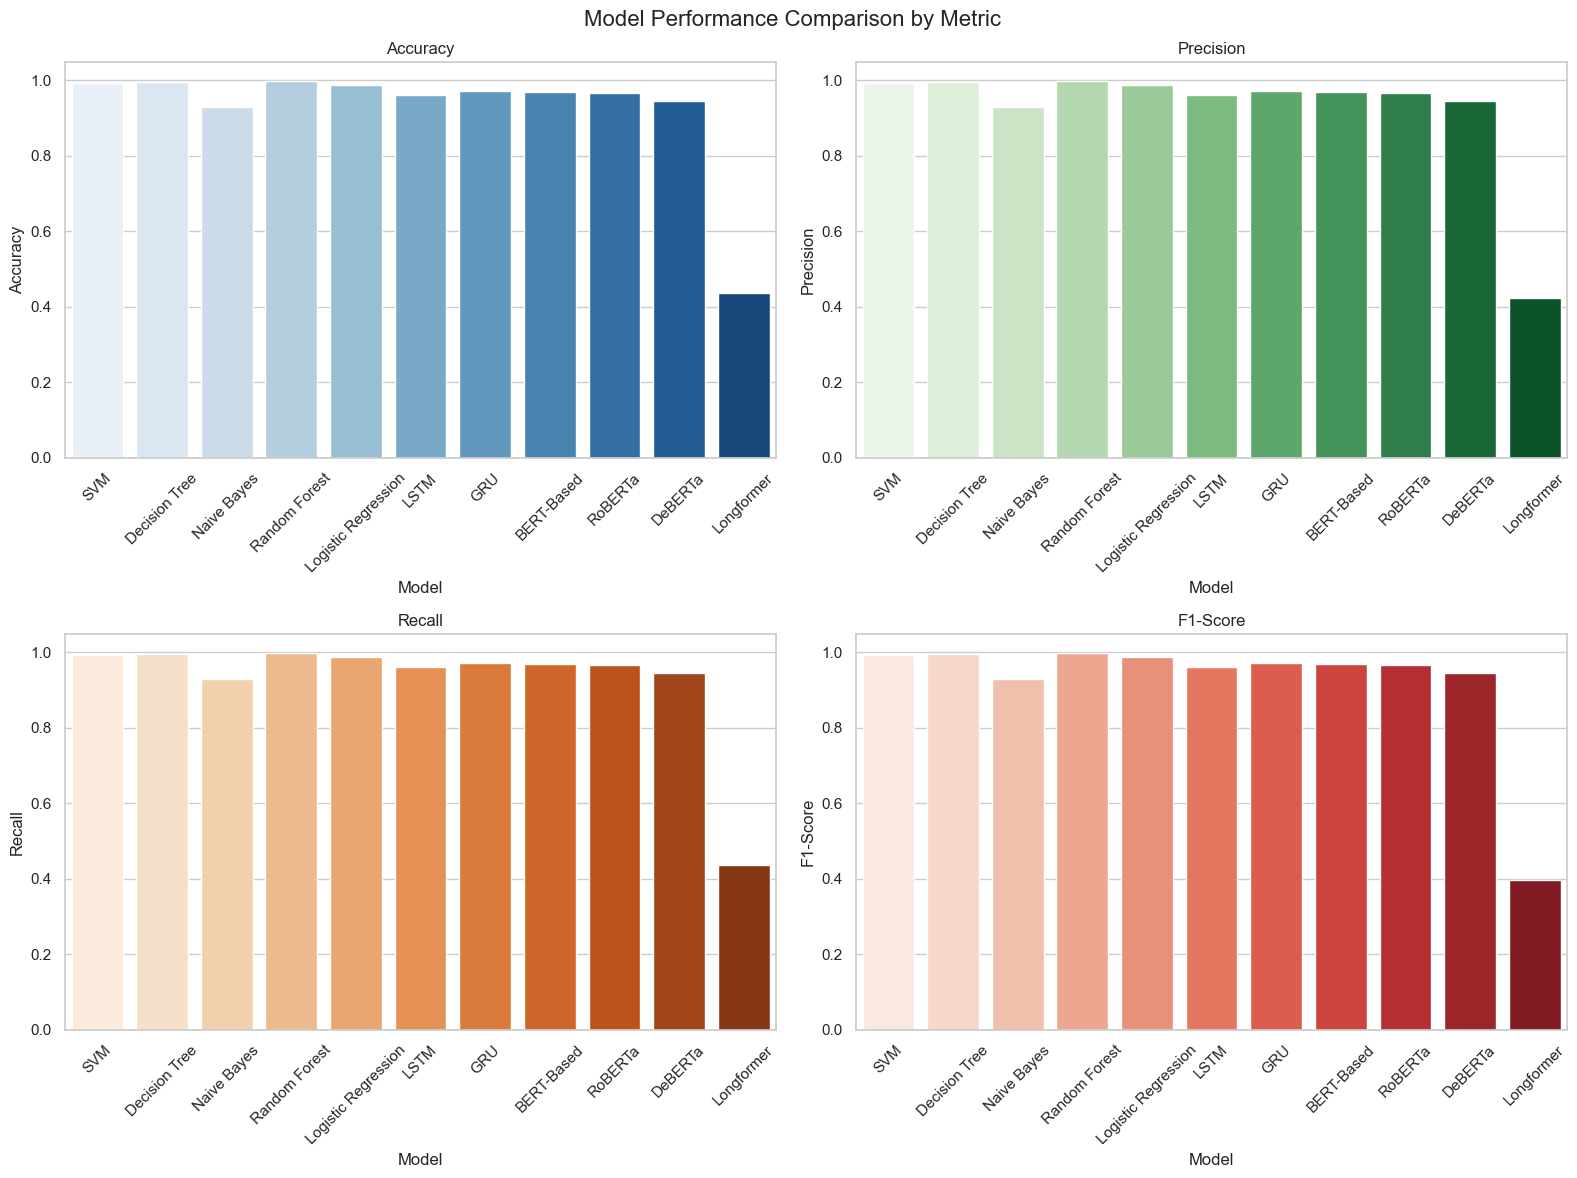

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Model Performance Comparison by Metric", fontsize=16)

# Plot Accuracy
sns.barplot(ax=axes[0, 0], x="Model", y="Accuracy", data=metrics_df, palette="Blues")
axes[0, 0].set_title("Accuracy")
axes[0, 0].tick_params(axis="x", rotation=45)

# Plot Precision
sns.barplot(ax=axes[0, 1], x="Model", y="Precision", data=metrics_df, palette="Greens")
axes[0, 1].set_title("Precision")
axes[0, 1].tick_params(axis="x", rotation=45)

# Plot Recall
sns.barplot(ax=axes[1, 0], x="Model", y="Recall", data=metrics_df, palette="Oranges")
axes[1, 0].set_title("Recall")
axes[1, 0].tick_params(axis="x", rotation=45)

# Plot F1-Score
sns.barplot(ax=axes[1, 1], x="Model", y="F1-Score", data=metrics_df, palette="Reds")
axes[1, 1].set_title("F1-Score")
axes[1, 1].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
import pickle

# Dictionary of models
models = {
    'SVM': svm_model,
    'Decision Tree': decision_tree_model,
    'Naive Bayes': naive_bayes_model,
    'Random Forest': random_forest_model,
    'Logistic Regression': logistic_regression_model
}

# Save each model to disk
for model_name, model in models.items():
    filename = f"{model_name.lower().replace(' ', '_')}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Saved {model_name} to {filename}")

Saved SVM to svm_model.pkl
Saved Decision Tree to decision_tree_model.pkl
Saved Naive Bayes to naive_bayes_model.pkl
Saved Random Forest to random_forest_model.pkl
Saved Logistic Regression to logistic_regression_model.pkl
